In [ ]:
import scipy.io as scipy
import numpy as np
import matplotlib.pyplot as plt
import librosa
from sklearn import preprocessing
import tensorflow as tf
import os
import librosa.display

In [ ]:
a = '/content/drive/MyDrive/Skeleton/a'
b = '_s'
c = '_t'
d = '_skeleton.mat'
file_list_skeleton = []
for i in range(10,20):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list_skeleton.append(file_path)
for i in range(1,2):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list_skeleton.append(file_path)
for i in range(20,28):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list_skeleton.append(file_path)
for i in range(2,10):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list_skeleton.append(file_path)
file_list_skeleton.remove('/content/drive/MyDrive/Skeleton/a23_s6_t4_skeleton.mat')
file_list_skeleton.remove('/content/drive/MyDrive/Skeleton/a27_s8_t4_skeleton.mat')
file_list_skeleton.remove('/content/drive/MyDrive/Skeleton/a8_s1_t4_skeleton.mat')

In [ ]:
def images_creater(file):
    data = scipy.loadmat(file)
    data = data['d_skel']
    x_images = data[0,0,:]
    y_images = data[0,0,:]
    z_images = data[0,0,:]
    for i in range(20):
        for j in range(3):
            if j == 0:
                x_images = np.vstack((x_images,data[i,j,:]))
            elif j == 1:
                y_images = np.vstack((y_images,data[i,j,:]))
            else:
                z_images = np.vstack((z_images,data[i,j,:]))
    x_images=x_images[1:,:]
    y_images=y_images[1:,:]
    z_images=z_images[1:,:]
    v_x = np.lib.stride_tricks.sliding_window_view(x_images,(20,40))
    v_y = np.lib.stride_tricks.sliding_window_view(y_images,(20,40))
    v_z = np.lib.stride_tricks.sliding_window_view(z_images,(20,40))
    v_squeeze = v_x.squeeze()
    v_x = np.expand_dims(v_squeeze,axis=-1)
    v_squeeze = v_y.squeeze()
    v_y = np.expand_dims(v_squeeze,axis=-1)
    v_squeeze = v_z.squeeze()
    v_z = np.expand_dims(v_squeeze,axis=-1)
    v_expand = np.concatenate((v_x,v_y,v_z), axis=3)

    label = file[-21:-19]
    if 'a' in label[0]:
        label = label[-1]
    label=int(label)
    if label == 27:
        label = 0
    labels = np.zeros(v_expand.shape[0],dtype = 'int32')
    for i in range(v_expand.shape[0]):
        labels[i] = label
    return v_expand,labels

In [ ]:
def load_data(data_directory):
    file_names = file_list_skeleton
    path = '/content/drive/MyDrive/Skeleton/a1_s1_t1_skeleton.mat'
    images,labels = images_creater(path)
    train_datas = images
    train_labels = labels
    test_datas = images
    test_labels = labels
    train_split = [1,3,5,7]
    for d in file_names:
        images,labels = images_creater(d)
        print(images.shape)
        if int(d[-17:-16]) in train_split:
            train_labels = np.append(train_labels,labels,axis = 0)
            train_datas = np.append(train_datas,images,axis = 0)
        else:
            test_labels = np.append(test_labels,labels,axis = 0)
            test_datas = np.append(test_datas,images,axis = 0)
    train_datas = train_datas[9:,:,:,:]    
    test_datas = test_datas[9:,:,:,:]
    test_labels = test_labels[9:]
    train_labels = train_labels[9:]
    return train_labels,train_datas,test_labels,test_datas

In [ ]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Skeleton/a1_s1_t1_skeleton.mat'
images,labels = images_creater(path)


In [ ]:
train_data = images
train_label = labels
test_data = images
test_label = labels
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)
train_split = [1,3,5,7]
image,label = images_creater(file_list_skeleton[0])
if int(file_list_skeleton[0][-17:-16]) in train_split:
  train_label = np.append(train_label,label,axis = 0)
  train_data = np.append(train_data,image,axis = 0)
else:
  test_label = np.append(test_label,label,axis = 0)
  test_data = np.append(test_data,image,axis = 0)

(9, 20, 40, 3)
(9,)
(9, 20, 40, 3)
(9,)


In [ ]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

In [ ]:
data_directory = '/content/drive/MyDrive/Skeleton'

In [ ]:
train_labels,train_datas,test_labels,test_datas = load_data(data_directory)

In [ ]:
print(train_labels.shape)
print(train_datas.shape)
print(test_labels.shape)
print(test_datas.shape)

(12390,)
(12390, 20, 40, 3)
(12330,)
(12330, 20, 40, 3)


In [ ]:
n = 15
train_x21 = train_datas[::n, ...]
train_y21 = train_labels[::n, ...]
test_x21 = test_datas[::n, ...]
test_y21 = test_labels[::n, ...]
print(train_y21.shape)
print(train_x21.shape)
print(test_y21.shape)
print(test_x21.shape)

(826,)
(826, 20, 40, 3)
(822,)
(822, 20, 40, 3)


In [ ]:
train_xnew1 = train_x21[:16]
train_ynew1 = train_y21[:16]
train_xx = np.concatenate((train_x21[:16], train_x21[37:53]))
train_yy = np.concatenate((train_y21[:16], train_y21[37:53]))
train_xx = np.concatenate((train_xx, train_x21[75:91]))
train_yy = np.concatenate((train_yy, train_y21[75:91]))
train_xx = np.concatenate((train_xx, train_x21[118:134]))
train_yy = np.concatenate((train_yy, train_y21[118:134]))
train_xx = np.concatenate((train_xx, train_x21[151:167]))
train_yy = np.concatenate((train_yy, train_y21[151:167]))
train_xx = np.concatenate((train_xx, train_x21[191:207]))
train_yy = np.concatenate((train_yy, train_y21[191:207]))
train_xx = np.concatenate((train_xx, train_x21[219:235]))
train_yy = np.concatenate((train_yy, train_y21[219:235]))
train_xx = np.concatenate((train_xx, train_x21[239:255]))
train_yy = np.concatenate((train_yy, train_y21[239:255]))
train_xx = np.concatenate((train_xx, train_x21[271:287]))
train_yy = np.concatenate((train_yy, train_y21[271:287]))
train_xx = np.concatenate((train_xx, train_x21[293:309]))
train_yy = np.concatenate((train_yy, train_y21[293:309]))
train_xx = np.concatenate((train_xx, train_x21[321:337]))
train_yy = np.concatenate((train_yy, train_y21[321:337]))
train_xx = np.concatenate((train_xx, train_x21[342:358]))
train_yy = np.concatenate((train_yy, train_y21[342:358]))
train_xx = np.concatenate((train_xx, train_x21[365:381]))
train_yy = np.concatenate((train_yy, train_y21[365:381]))
train_xx = np.concatenate((train_xx, train_x21[411:427]))
train_yy = np.concatenate((train_yy, train_y21[411:427]))
train_xx = np.concatenate((train_xx, train_x21[445:461]))
train_yy = np.concatenate((train_yy, train_y21[445:461]))
train_xx = np.concatenate((train_xx, train_x21[483:499]))
train_yy = np.concatenate((train_yy, train_y21[483:499]))
train_xx = np.concatenate((train_xx, train_x21[499:515]))
train_yy = np.concatenate((train_yy, train_y21[499:515]))
train_xx = np.concatenate((train_xx, train_x21[517:533]))
train_yy = np.concatenate((train_yy, train_y21[517:533]))
train_xx = np.concatenate((train_xx, train_x21[561:577]))
train_yy = np.concatenate((train_yy, train_y21[561:577]))
train_xx = np.concatenate((train_xx, train_x21[609:625]))
train_yy = np.concatenate((train_yy, train_y21[609:625]))
train_xx = np.concatenate((train_xx, train_x21[629:645]))
train_yy = np.concatenate((train_yy, train_y21[629:645]))
train_xx = np.concatenate((train_xx, train_x21[657:673]))
train_yy = np.concatenate((train_yy, train_y21[657:673]))
train_xx = np.concatenate((train_xx, train_x21[679:695]))
train_yy = np.concatenate((train_yy, train_y21[679:695]))
train_xx = np.concatenate((train_xx, train_x21[703:719]))
train_yy = np.concatenate((train_yy, train_y21[703:719]))
train_xx = np.concatenate((train_xx, train_x21[733:749]))
train_yy = np.concatenate((train_yy, train_y21[733:749]))
train_xx = np.concatenate((train_xx, train_x21[764:779]))
train_yy = np.concatenate((train_yy, train_y21[764:779]))
train_xx = np.concatenate((train_xx, train_x21[785:801]))
train_yy = np.concatenate((train_yy, train_y21[785:801]))
print(train_xx.shape)
print(train_yy.shape)
test_xnew1 = test_x21[:16]
test_ynew1 = test_y21[:16]
test_xx = np.concatenate((test_x21[:16], test_x21[37:53]))
test_yy = np.concatenate((test_y21[:16], test_y21[37:53]))
test_xx = np.concatenate((test_xx, test_x21[80:96]))
test_yy = np.concatenate((test_yy, test_y21[80:96]))
test_xx = np.concatenate((test_xx, test_x21[117:133]))
test_yy = np.concatenate((test_yy, test_y21[117:133]))
test_xx = np.concatenate((test_xx, test_x21[148:164]))
test_yy = np.concatenate((test_yy, test_y21[148:164]))
test_xx = np.concatenate((test_xx, test_x21[183:199]))
test_yy = np.concatenate((test_yy, test_y21[183:199]))
test_xx = np.concatenate((test_xx, test_x21[208:224]))
test_yy = np.concatenate((test_yy, test_y21[208:224]))
test_xx = np.concatenate((test_xx, test_x21[231:247]))
test_yy = np.concatenate((test_yy, test_y21[231:247]))
test_xx = np.concatenate((test_xx, test_x21[261:277]))
test_yy = np.concatenate((test_yy, test_y21[261:277]))
test_xx = np.concatenate((test_xx, test_x21[288:304]))
test_yy = np.concatenate((test_yy, test_y21[288:304]))
test_xx = np.concatenate((test_xx, test_x21[321:337]))
test_yy = np.concatenate((test_yy, test_y21[321:337]))
test_xx = np.concatenate((test_xx, test_x21[348:364]))
test_yy = np.concatenate((test_yy, test_y21[348:364]))
test_xx = np.concatenate((test_xx, test_x21[367:383]))
test_yy = np.concatenate((test_yy, test_y21[367:383]))
test_xx = np.concatenate((test_xx, test_x21[424:440]))
test_yy = np.concatenate((test_yy, test_y21[424:440]))
test_xx = np.concatenate((test_xx, test_x21[450:465]))
test_yy = np.concatenate((test_yy, test_y21[450:465]))
test_xx = np.concatenate((test_xx, test_x21[488:504]))
test_yy = np.concatenate((test_yy, test_y21[488:504]))
test_xx = np.concatenate((test_xx, test_x21[507:523]))
test_yy = np.concatenate((test_yy, test_y21[507:523]))
test_xx = np.concatenate((test_xx, test_x21[528:544]))
test_yy = np.concatenate((test_yy, test_y21[528:544]))
test_xx = np.concatenate((test_xx, test_x21[571:586]))
test_yy = np.concatenate((test_yy, test_y21[571:586]))
test_xx = np.concatenate((test_xx, test_x21[613:629]))
test_yy = np.concatenate((test_yy, test_y21[613:629]))
test_xx = np.concatenate((test_xx, test_x21[637:653]))
test_yy = np.concatenate((test_yy, test_y21[637:653]))
test_xx = np.concatenate((test_xx, test_x21[666:682]))
test_yy = np.concatenate((test_yy, test_y21[666:682]))
test_xx = np.concatenate((test_xx, test_x21[692:708]))
test_yy = np.concatenate((test_yy, test_y21[692:708]))
test_xx = np.concatenate((test_xx, test_x21[711:727]))
test_yy = np.concatenate((test_yy, test_y21[711:727]))
test_xx = np.concatenate((test_xx, test_x21[734:750]))
test_yy = np.concatenate((test_yy, test_y21[734:750]))
test_xx = np.concatenate((test_xx, test_x21[751:767]))
test_yy = np.concatenate((test_yy, test_y21[751:767]))
test_xx = np.concatenate((test_xx, test_x21[783:799]))
test_yy = np.concatenate((test_yy, test_y21[783:799]))
print(test_xx.shape)
print(test_yy.shape)

(431, 20, 40, 3)
(431,)
(430, 20, 40, 3)
(430,)


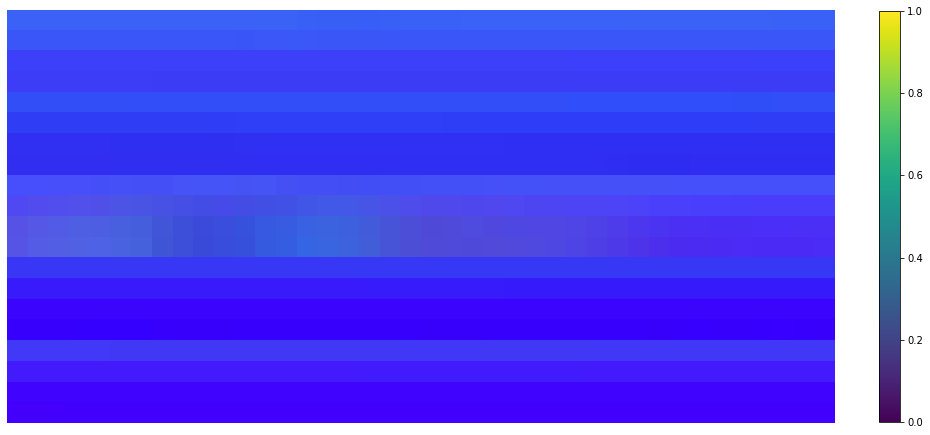

In [ ]:
import matplotlib.pyplot as plt

image = train_datas[400]
image_min = image.min()
image_max = image.max()
image = (image - image_min) / (image_max - image_min)

# Display the normalized image using imshow
fig, ax = plt.subplots(figsize=(16, 16))
plt.imshow(image)
plt.axis('off')

# Add a color bar to show the color mapping for the pixel values
cbar = plt.colorbar(fraction=0.023)
cbar.ax.tick_params(labelsize=10)

plt.show()


In [ ]:
train_datas = train_xx
train_labels = train_yy
test_datas = test_xx
test_labels = test_yy

In [ ]:
max1 = np.max(train_datas)
min1 = np.min(train_datas)
a = (train_datas - min1)/ (max1-min1)
train_datas = (a-0.5)*2
print(np.max(train_datas))
print(np.min(train_datas))
b = (test_datas - min1)/ (max1-min1)
test_datas = (b-0.5)*2
print(np.max(test_datas))
print(np.min(test_datas))

1.0
-1.0
0.9490938153789554
-0.9785974439843862


In [ ]:
train_arr = np.arange(train_datas.shape[0])
test_arr = np.arange(test_datas.shape[0])
np.random.seed(822)
np.random.shuffle(train_arr)
np.random.shuffle(test_arr)
train_datas_shuffled = train_datas[train_arr]
train_labels_shuffled = train_labels[train_arr]
test_datas_shuffled = test_datas[test_arr]
test_labels_shuffled = test_labels[test_arr]
print(train_datas_shuffled.shape)

(431, 20, 40, 3)


In [ ]:
train_datas = tf.image.resize(train_datas_shuffled,[224,224])
train_labels = train_labels_shuffled

In [ ]:
# ignore
test_datas = tf.image.resize(test_datas_shuffled,[224,224])
test_labels = test_labels_shuffled

In [ ]:
# ignore
print(train_datas.shape)
print(train_labels.shape)
print(test_datas.shape)
print(test_labels.shape)

(431, 224, 224, 3)
(431,)
(430, 224, 224, 3)
(430,)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_datas, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_datas, test_labels))
#valid_dataset = tf.data.Dataset.from_tensor_slices((valid_datas, valid_labels))
AUTOTUNE = tf.data.AUTOTUNE
buffer_size = train_datas.shape[0]
batch_size = 8
train_dataset = train_dataset.shuffle(buffer_size=buffer_size)\
                    .batch(batch_size,drop_remainder=True).prefetch(AUTOTUNE)

test_dataset = test_dataset.batch(batch_size,drop_remainder=True).prefetch(AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Input,Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50

In [ ]:
num_classes = 27

In [ ]:
inputs = keras.Input(shape=(224,224,3),name='input_skeleton')
resnet_skeleton = ResNet50(include_top=False, weights='imagenet', input_tensor=inputs, input_shape=(224,224,3),pooling='max')
for layer in resnet_skeleton.layers:
    layer._name = layer.name + '_skeleton'
outputs = Dense(num_classes, activation='softmax')(resnet_skeleton.output)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.001
sgd = tf.keras.optimizers.SGD(learning_rate=base_learning_rate,decay=1e-6,momentum=0.9,nesterov=True)
adam=tf.keras.optimizers.Adam(learning_rate=base_learning_rate)
model.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/skeleton_data/checkpoint_fullmodel/skeleton_weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)  
#model.save_weights(checkpoint_path)
#model.load_weights(checkpoint_filepath)
history = model.fit(train_dataset,validation_data=test_dataset,epochs=50,verbose=2,callbacks=[model_checkpoint_callback])

Epoch 1/50
53/53 - 371s - loss: 23.9837 - accuracy: 0.1061 - val_loss: 12641.1201 - val_accuracy: 0.0401 - 371s/epoch - 7s/step
Epoch 2/50
53/53 - 354s - loss: 3.5040 - accuracy: 0.2830 - val_loss: 3.3575 - val_accuracy: 0.0354 - 354s/epoch - 7s/step
Epoch 3/50
53/53 - 352s - loss: 2.2537 - accuracy: 0.4151 - val_loss: 3.3367 - val_accuracy: 0.0094 - 352s/epoch - 7s/step
Epoch 4/50
53/53 - 357s - loss: 1.5813 - accuracy: 0.5731 - val_loss: 3.3261 - val_accuracy: 0.0401 - 357s/epoch - 7s/step
Epoch 5/50
53/53 - 350s - loss: 1.1386 - accuracy: 0.6439 - val_loss: 3.3187 - val_accuracy: 0.0401 - 350s/epoch - 7s/step
Epoch 6/50
53/53 - 355s - loss: 0.8014 - accuracy: 0.7736 - val_loss: 3.3184 - val_accuracy: 0.0212 - 355s/epoch - 7s/step
Epoch 7/50
53/53 - 355s - loss: 0.6980 - accuracy: 0.7854 - val_loss: 3.3448 - val_accuracy: 0.0354 - 355s/epoch - 7s/step
Epoch 8/50
53/53 - 354s - loss: 0.5088 - accuracy: 0.8514 - val_loss: 3.3259 - val_accuracy: 0.0354 - 354s/epoch - 7s/step
Epoch 9/50


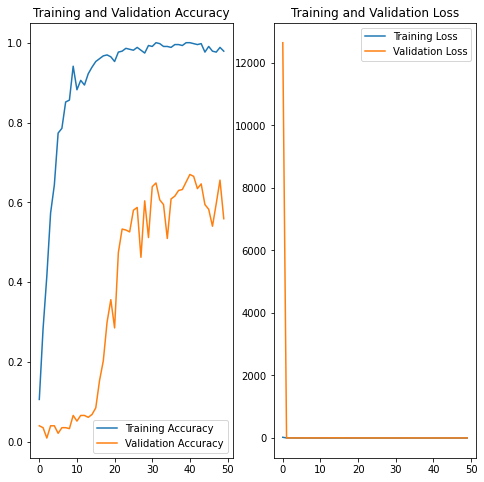

In [ ]:
epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
with open("/content/drive/MyDrive/skeleton_train/skeleton_result_2.txt", "w") as file:
    for item in acc:
        file.write(str(item) + "\n")
    file.write("\n")
    for item in val_acc:
        file.write(str(item) + "\n")
    file.write("\n")
    for item in loss:
        file.write(str(item) + "\n")
    file.write("\n")
    for item in val_loss:
        file.write(str(item) + "\n")